In [ ]:
# download the chessman dataset
!wget --no-check-certificate \
    https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
    -O /tmp/Chessman-image-dataset.zip

--2023-03-04 06:35:29--  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip [following]
--2023-03-04 06:35:29--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M   118MB/s    in 

In [ ]:
# extract the dataset
import os
import zipfile
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# list of directories in the data set
os.listdir('/tmp/Chessman-image-dataset/Chess')

['Queen', 'Pawn', 'Rook', 'Knight', 'Bishop', 'King']

In [ ]:
# check the number of files in each directory
print('total Knight images: ', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight')))
print('total Pawn images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn')))
print('total Bishop images: ', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Bishop')))
print('total Queen images: ', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Queen')))
print('total Rook images: ', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Rook')))
print('total King images: ', len(os.listdir('/tmp/Chessman-image-dataset/Chess/King')))

total Knight images:  106
total Pawn images : 107
total Bishop images:  87
total Queen images:  78
total Rook images:  102
total King images:  76


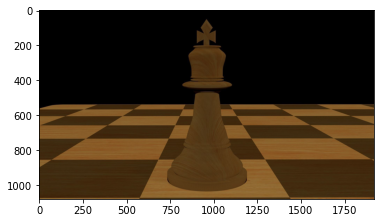

In [ ]:
# display some sample images
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
imgplot = plt.imshow(img)

In [ ]:
# based on the output in the previous cell, the number of images is different in each directory
# in addition, the format and size of the images are also not the same
# to solve this problem, we will try to apply image augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   fill_mode='nearest',
                                   validation_split=0.1)  # set validation split

In [ ]:
# image generator

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=8,
    class_mode='categorical',
    subset='training')  # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_dir,  # same directory as training data
    target_size=(150,150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [ ]:
# build a Convolutional Neural Network (CNN) model

'''
   # using 3 convolution layers and 2 hidden layers with 512 and 256 perceptron units
   
'''

import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 36, 36, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        1

In [ ]:
# compile the model 
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# train the model
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=50,
                    verbose=2)

Epoch 1/50
63/63 - 54s - loss: 1.8545 - accuracy: 0.1864 - val_loss: 1.7846 - val_accuracy: 0.1923 - 54s/epoch - 855ms/step
Epoch 2/50
63/63 - 50s - loss: 1.7895 - accuracy: 0.1683 - val_loss: 1.7772 - val_accuracy: 0.2308 - 50s/epoch - 787ms/step
Epoch 3/50
63/63 - 48s - loss: 1.7851 - accuracy: 0.1924 - val_loss: 1.7799 - val_accuracy: 0.1923 - 48s/epoch - 759ms/step
Epoch 4/50
63/63 - 51s - loss: 1.7834 - accuracy: 0.2084 - val_loss: 1.7702 - val_accuracy: 0.2308 - 51s/epoch - 811ms/step
Epoch 5/50
63/63 - 49s - loss: 1.7513 - accuracy: 0.2285 - val_loss: 1.7551 - val_accuracy: 0.2308 - 49s/epoch - 785ms/step
Epoch 6/50
63/63 - 57s - loss: 1.7479 - accuracy: 0.2265 - val_loss: 1.8071 - val_accuracy: 0.2692 - 57s/epoch - 909ms/step
Epoch 7/50
63/63 - 52s - loss: 1.7268 - accuracy: 0.2665 - val_loss: 1.7662 - val_accuracy: 0.2500 - 52s/epoch - 820ms/step
Epoch 8/50
63/63 - 50s - loss: 1.6898 - accuracy: 0.2846 - val_loss: 1.7265 - val_accuracy: 0.2500 - 50s/epoch - 791ms/step
Epoch 9/

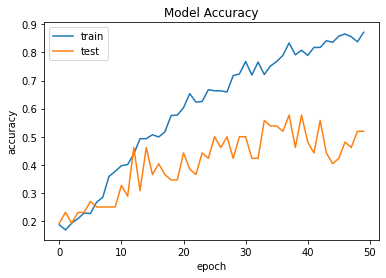

In [ ]:
# plot the accuracy of the model
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

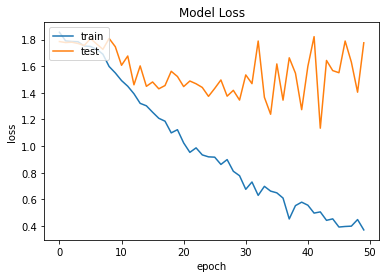

In [ ]:
# plot the loss of the model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()